# **1)Problem Statement**

To enhance sales performance, this project focuses on building a predictive model that estimates product sales at individual BigMart stores. By analyzing a comprehensive dataset encompassing various product and store attributes, we employ machine learning techniques to develop a robust model. This model aims to provide predictions by identifying crucial factors and patterns that influence sales. Through this endeavor, we empower BigMart to make data-driven decisions and optimize their sales strategies for improved business outcomes.

# **2)Hypothesis Generation**

**Store Level Hypotheses:**

* *City Type*: Stores located in urban or Tier 1 cities are expected to have higher sales due to the higher income levels of residents.
* *Store Capacity*: Larger stores with ample space are anticipated to have higher sales as they offer a comprehensive shopping experience.
* *Competitors*: Stores in close proximity to similar establishments may face tougher competition, resulting in lower sales.

**Product Level Hypotheses**
* *Brand*: Branded products should have higher sales because of higher trust in the customer.
* *Utility*: Daily use products should have a higher tendency to sell as compared to the specific use products.
* *Display Area*: Products which are given bigger shelves in the store are likely to catch attention first and sell more. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
* *Promotional Offers*: Products accompanied with attractive offers and discounts will sell more.



# **3)Loading Packages and Data**

In this step, we're going to import the necessary libraries and load the dataset into our programming environment.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  
import seaborn as sns
import warnings
import ydata_profiling as pp
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import h5py

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Now that all the necessary libraries are imported, we proceed to load our training and test datasets.

In [2]:
#loading training dataset
bigm_train=pd.read_csv("../input/big-mart-dataset/Train.csv")
#loading test dataset
bigm_test=pd.read_csv("../input/big-mart-dataset/Test.csv")

 # **4)Data Structure and Content**
After loading the dataset and before processing it, we need to understand the structure of the data and explore its contents beforehand.

 **A- Training dataset**

In [3]:
#number of rows and columns in the dataset file
bigm_train.shape

(8523, 12)

In [4]:
bigm_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
bigm_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#first 5 rows of the dataset
bigm_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

 **B- Test dataset**

In [7]:
#number of rows and columns in the dataset file
bigm_test.shape

(5681, 11)

In [8]:
bigm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
bigm_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [10]:
#first 5 rows of the dataset
bigm_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

Our datasets has 12 columns:

•Item_Identifier(Categorical): Id of each item

•Item_Weight(Numerical): weight of the product.

•Item_Fat_Content(Categorical): fat content in the product.

•Item_Visibility: proportion of the store's total display area dedicated to the specific product.

•Item_Type(Categorical): indicates to which category the item belongs. 

•Item_MRP(Numerical): maximum retail price (MRP) of the product.

•Outlet_Identifier(Categorical): Id of each store. 

•Outlet_Establishment_Year(Numerical): The year in which the store was established.

•Outlet_Size(Categorical): size of the store. 

•Outlet_Location_Type(Categorical): indicates in which type of city the store is located .

•Outlet_Type (Categorical): type of outlet (grocery store, supermarket, etc.).

•Item_Outlet_Sales(Numerical): Our target variable. Indicates the sales of the item in the store.

# **5)Exploratory Data Analysis**

**Outliers**

Let's check for outliers in our dataset.

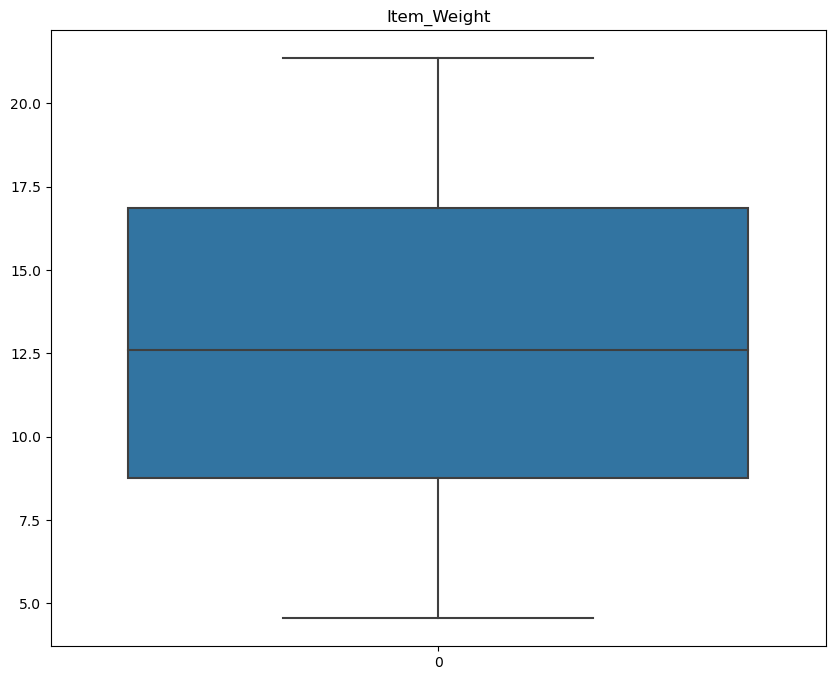

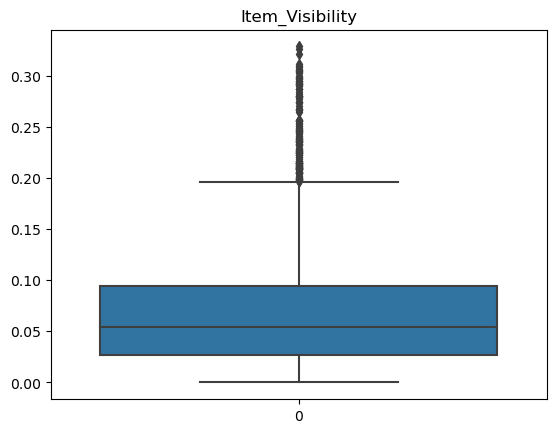

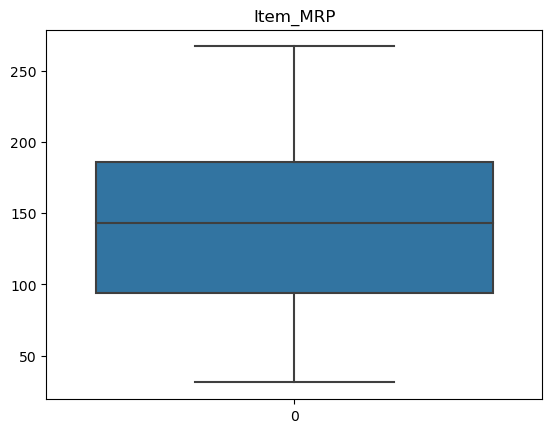

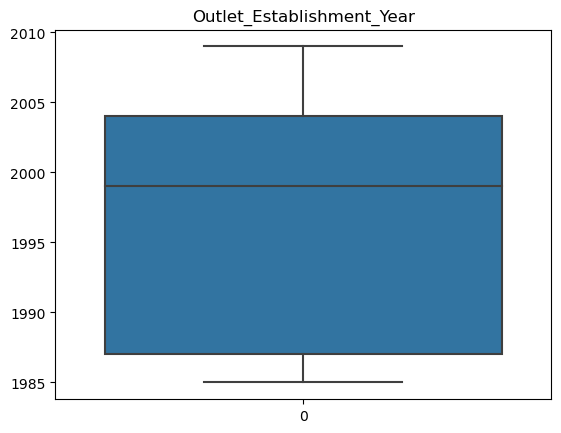

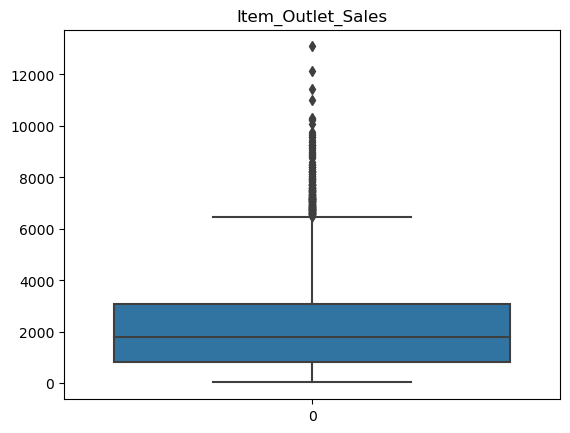

In [11]:
plt.figure(figsize=(10, 8)) 

numerical_features = [feature for feature in bigm_train.columns if bigm_train[feature].dtype != 'object']
for feature in numerical_features:
    
    sns.boxplot(bigm_train[feature])
    plt.title(feature)
    plt.show()

Both Item_Visibility and Item_Outlet_Sales have outliers

**A- Training data**

In [12]:
bigm_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [13]:
#ratio of null values in each column
bigm_train.isnull().sum()/bigm_train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [14]:
pp.ProfileReport(bigm_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**B- Test dataset**

In [15]:
bigm_test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [16]:
#ratio of null values in each column
bigm_test.isnull().sum()/bigm_test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [17]:
pp.ProfileReport(bigm_test)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **6)Univariate Analysis**

* **Item_Fat_Content**

In [18]:
bigm_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
bigm_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

It seems that we need to fix the inconsistencies in this column since we only need two distinct entries: Low Fat and Regular. To do so, we need to replace the other entries with the right values.

In [20]:
bigm_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
bigm_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

Now that we fixed the issues of our column, we can visualize our data in a barplot.

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

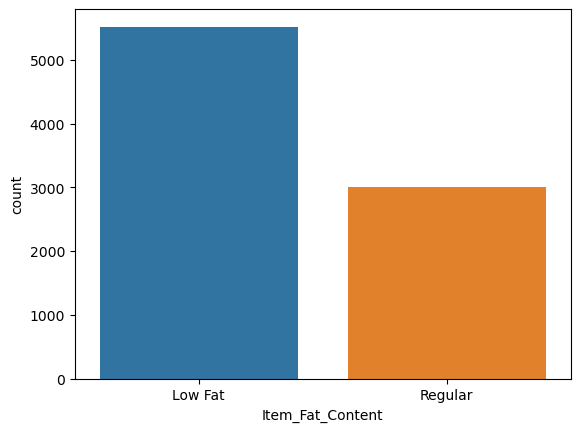

In [21]:

sns.countplot(x='Item_Fat_Content',data=bigm_train)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

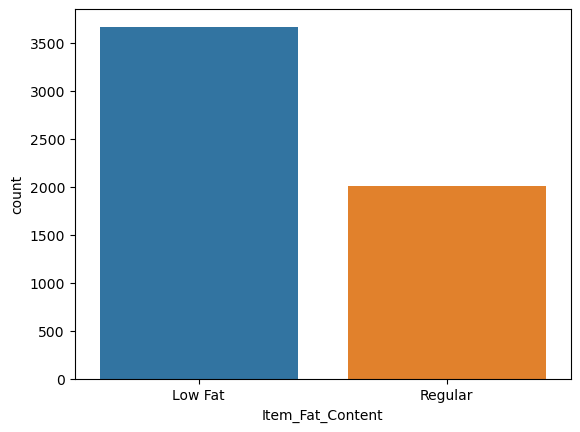

In [22]:
sns.countplot(x='Item_Fat_Content',data=bigm_test)

Low fat products are more bought than regular products

* **Item_Type**

In [23]:
bigm_train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

the different items are indeed all unique and there are no inconsistencies. We can proceed to plot the data in order to analyze it.

<Axes: xlabel='count', ylabel='Item_Type'>

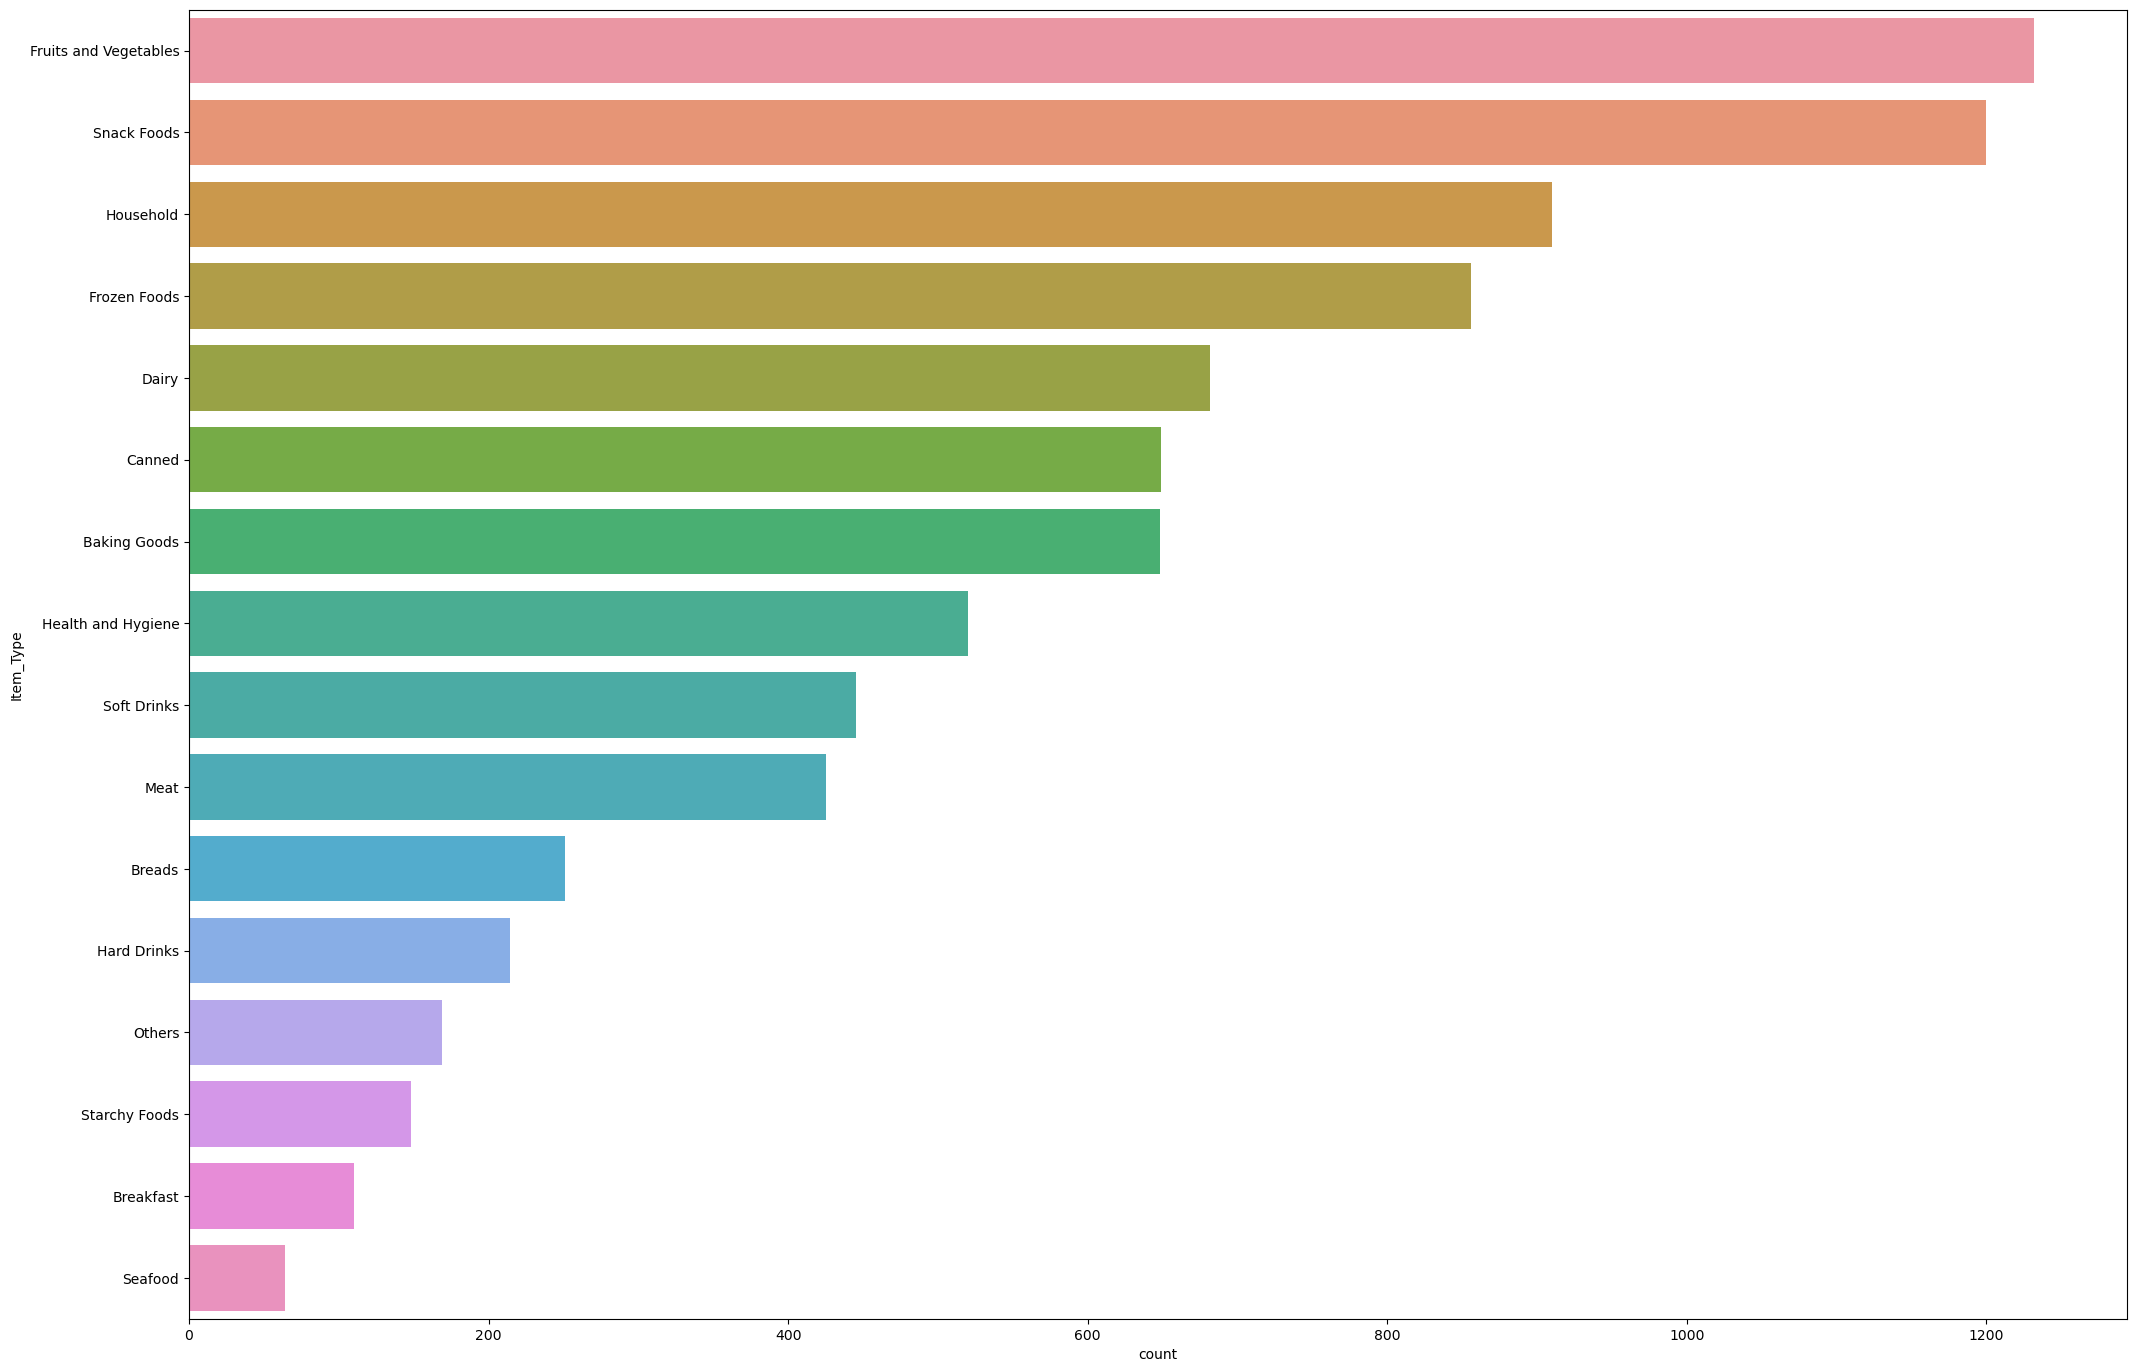

In [24]:
plt.figure(figsize=(25,17))
sns.countplot(y='Item_Type',data=bigm_train,order = bigm_train['Item_Type'].value_counts().index)

<Axes: xlabel='count', ylabel='Item_Type'>

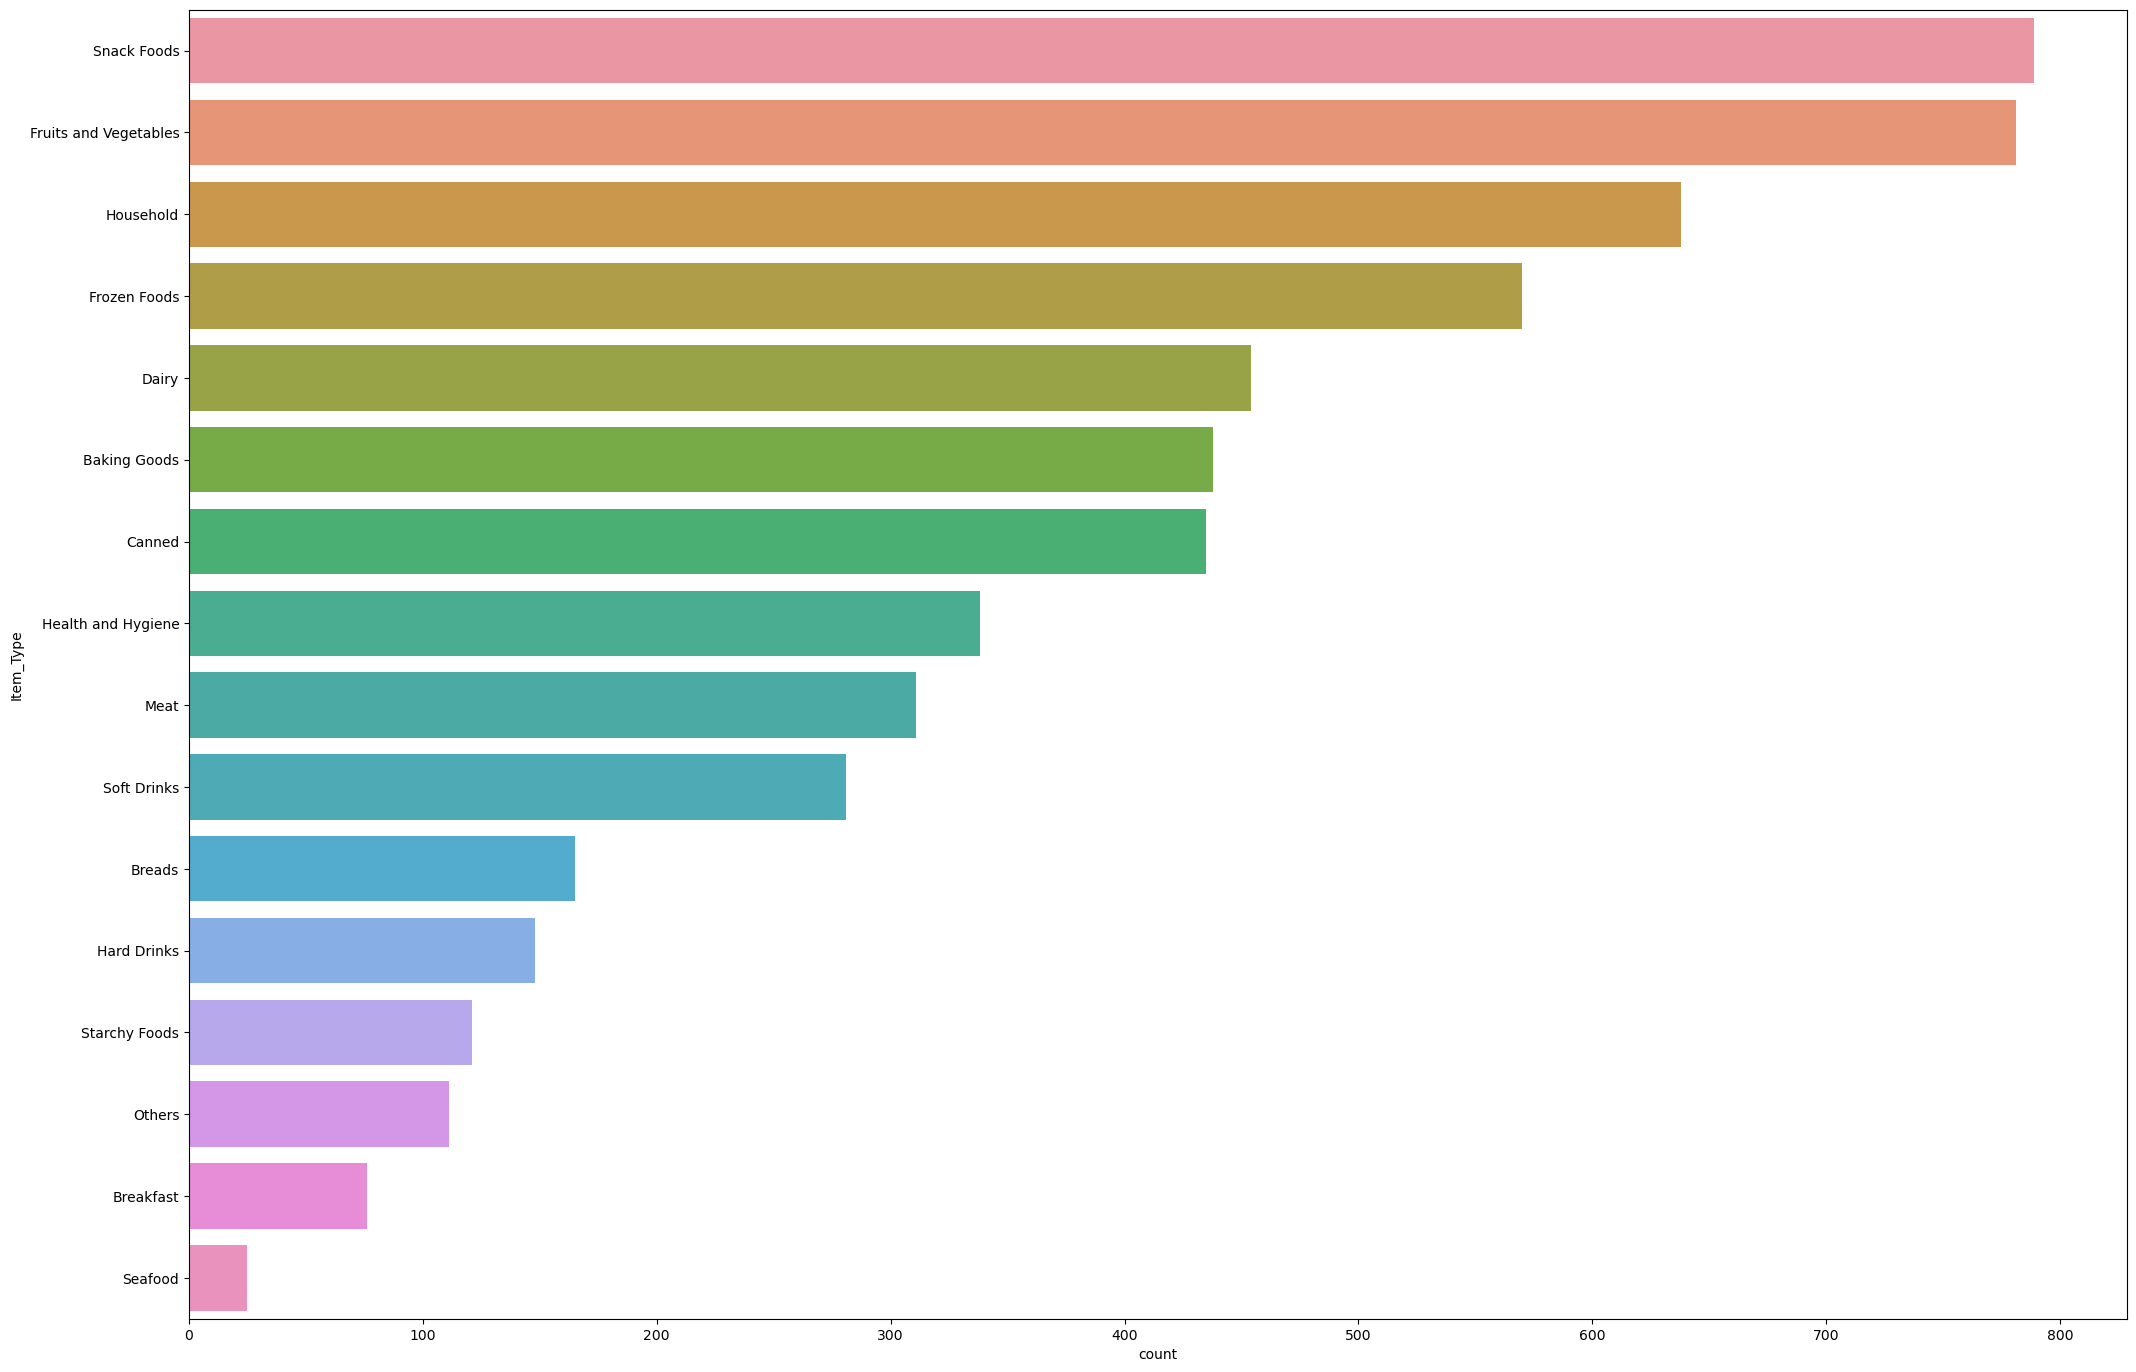

In [25]:
plt.figure(figsize=(25,17))
sns.countplot(y='Item_Type',data=bigm_test,order = bigm_test['Item_Type'].value_counts().index)

Fruits&Vegetables and Snack Foods are the most bought item types while Seafood, Breakfast and other non categorized types don't sell much.

* **Outlet_Establishment_Year**

In [26]:
bigm_train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

The outlets were build between 1985 and 2009. let's plot the data to get more info.

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

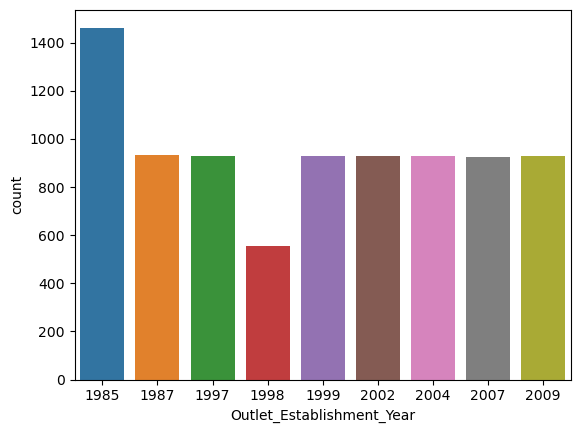

In [27]:
sns.countplot(data=bigm_train,x='Outlet_Establishment_Year')

It seems that the outlets built on 1985 have more items than any other outlets. Likewise, the outlets built on 1998 have less items.

* **Outlet_Size**

<Axes: xlabel='Outlet_Size', ylabel='count'>

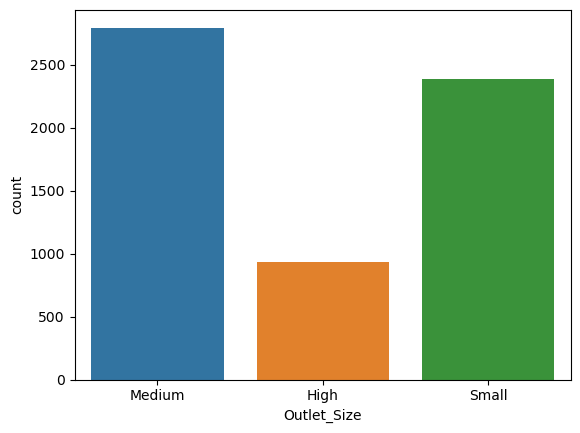

In [28]:
sns.countplot(data=bigm_train,x='Outlet_Size')

Most outlets are of Medium size. High size outlets are not that abundant.

* **Outlet_Location_Type**

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

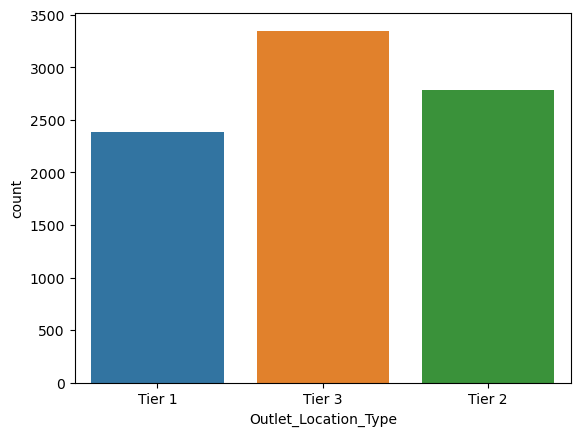

In [29]:
sns.countplot(data=bigm_train,x='Outlet_Location_Type')

Tier 3 cities contain the most number of outlets.

* **Outlet_Type**

<Axes: xlabel='Outlet_Type', ylabel='count'>

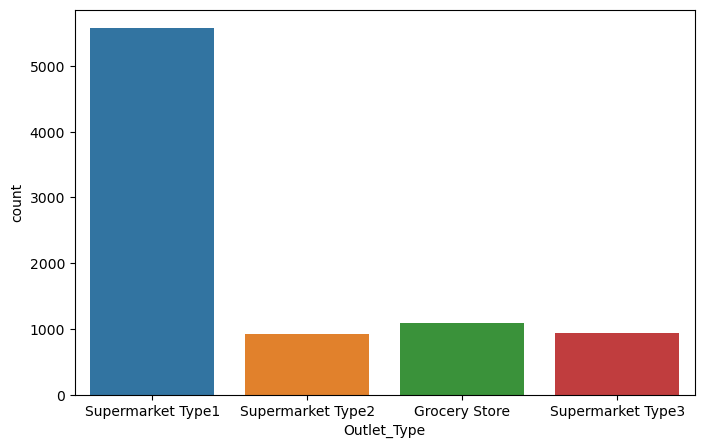

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=bigm_train,x='Outlet_Type')

Supermakets Type 1 are the most built type. There are more than 5000 outlet of Type1 of Supermarkets.

* **Item_Outlet_Sales**

In [31]:
bigm_train.Item_Outlet_Sales.unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

This column has a high cardinality. We'll use a distribution plot to visualize the data in an efficient way.

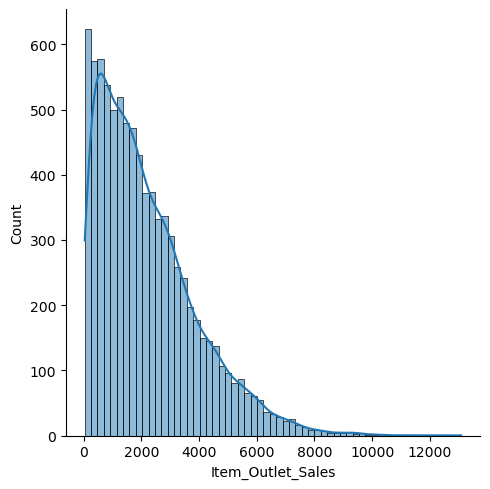

In [32]:
sns.displot(bigm_train.Item_Outlet_Sales,kde=True)

# **7)Bivariate Analysis**

Since our target variable is Item_Outlet_Sales, we'll find its correlation to the different other variables. Below is a table showing the correlation between our dependent variables and target variable.

In [33]:
num_features = bigm_train.select_dtypes(include=[np.number])
corr=num_features.corr()
corr['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014123
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

Item_MRP has the highest positive correlation to Item_Outlet_Sales. Meanwhile, Item_Weight has the lowest correlation rate with the target variable.

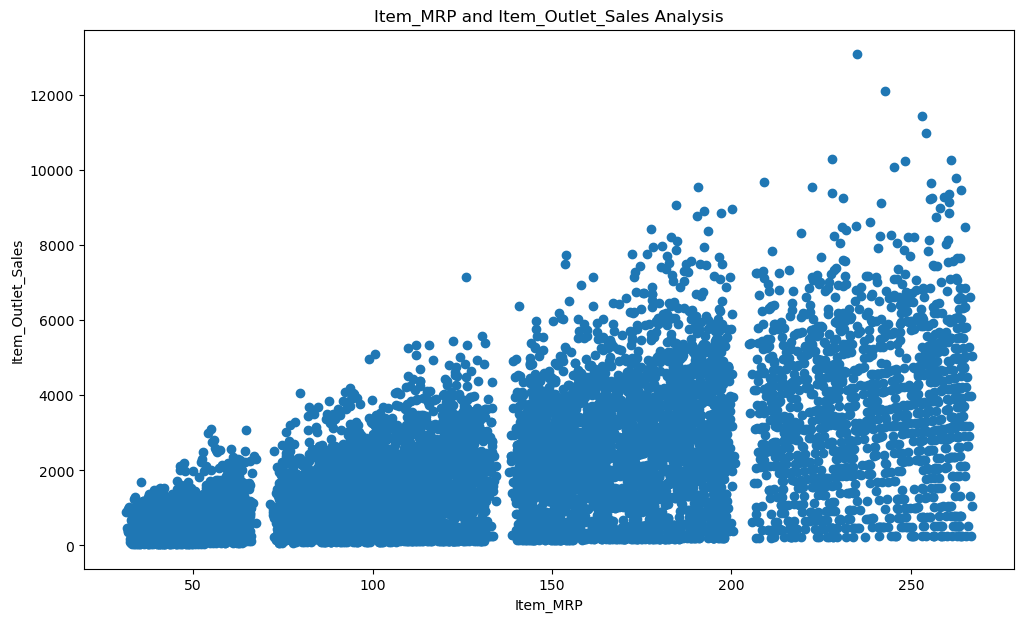

In [34]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.scatter(bigm_train.Item_MRP, bigm_train.Item_Outlet_Sales)

The scatterplot shows a positive relationship between the two variables: as the item's maximum retail price increases, the item sales tends to increase as well.

In [35]:
#define response variable
y = bigm_train['Item_Outlet_Sales']

#define explanatory variable
x = bigm_train['Item_MRP']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4049.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:39:36   Log-Likelihood:                -73866.
No. Observations:                8523   AIC:                         1.477e+05
Df Residuals:                    8521   BIC:                         1.478e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5751     37.671     -0.307      0.7

The fitted regression equation turns out to be:

Item Outlet Sales = 15.5530 * (Item_MRP) - 11.5751

Text(0, 0.5, 'Item_Outlet_Sales')

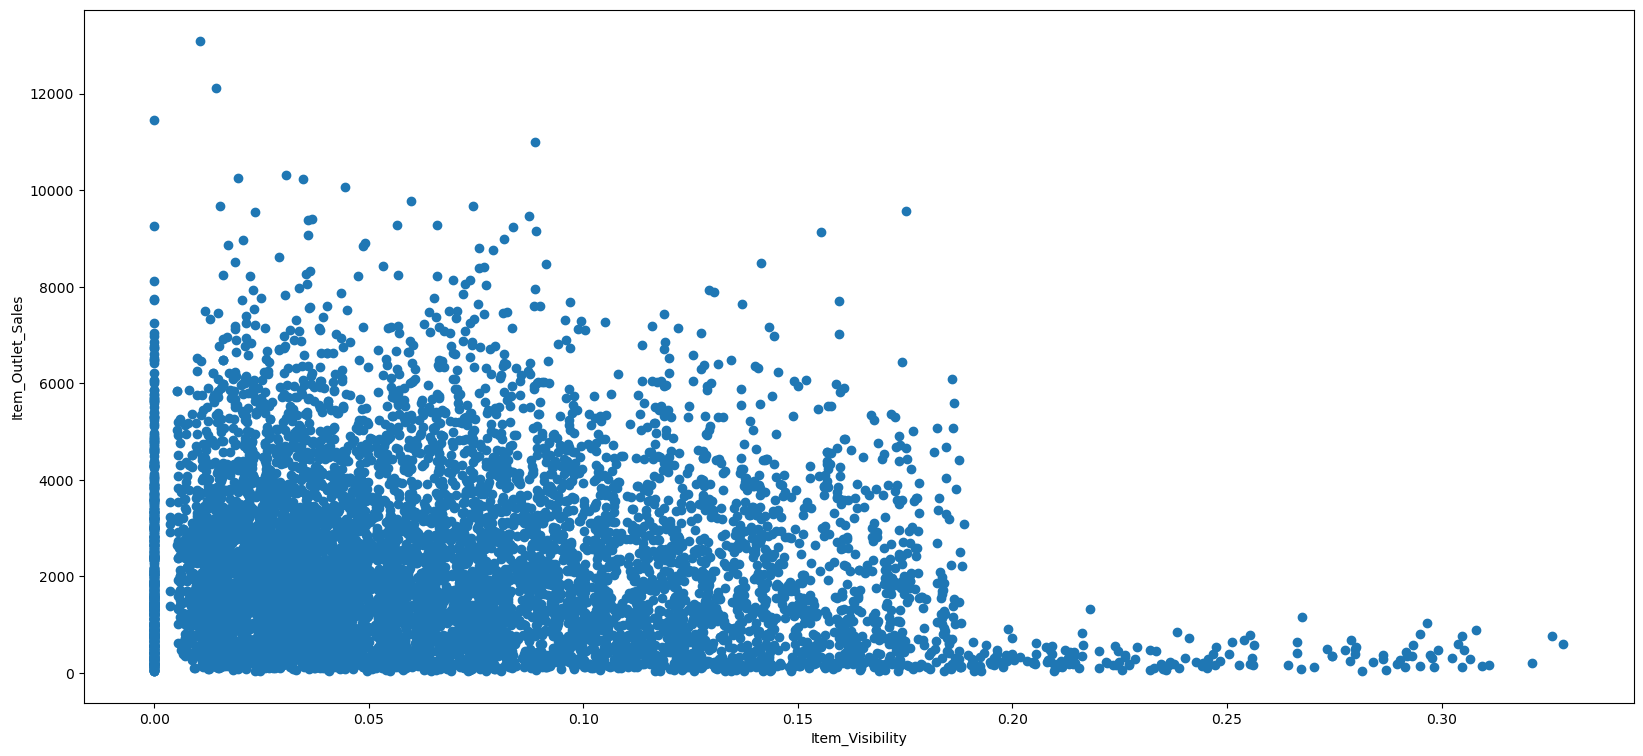

In [36]:
plt.figure(figsize=[20,9])
plt.scatter(bigm_train.Item_Visibility,bigm_train.Item_Outlet_Sales)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')

Low bisibility items sell more than items with high visibility. This isn't surprising since the correlation rate we've found earlier was negative. This result is all logical since items that have high visibility, meaning that they take a lot of space of the display space in the store are less sold and that is because they tend to be pricey products not for everyday use.

In [37]:
pd.pivot_table(bigm_train,'Item_Outlet_Sales',index='Item_Type',columns='Outlet_Size')

Outlet_Size                   High       Medium        Small
Item_Type                                                   
Baking Goods           2050.901134  2386.702771  1724.681911
Breads                 2080.731528  2718.244814  2158.795546
Breakfast              2104.286508  2865.085356  1715.988533
Canned                 2211.265203  2562.075105  2038.457667
Dairy                  2453.181713  2725.360676  1900.495836
Frozen Foods           2214.096189  2612.229851  1895.489818
Fruits and Vegetables  2405.118103  2844.100923  1931.258454
Hard Drinks            2363.590000  2551.079280  1926.518932
Health and Hygiene     1953.042439  2475.142832  1929.155500
Household              2408.217992  2869.842203  1974.824976
Meat                   2321.953141  2792.575217  1800.519024
Others                 2202.383175  2410.746565  1529.282073
Seafood                1629.345760  2514.441257  2550.513350
Snack Foods            2473.968987  2799.134167  1958.330459
Soft Drinks            2351.727890  2437.250807  1602.612305
Starchy Foods          2302.791947  2589.615229  2588.753047

By having a look at the table above, we can conclude that medium size outlets have the most sales while small size outlets sell the least.

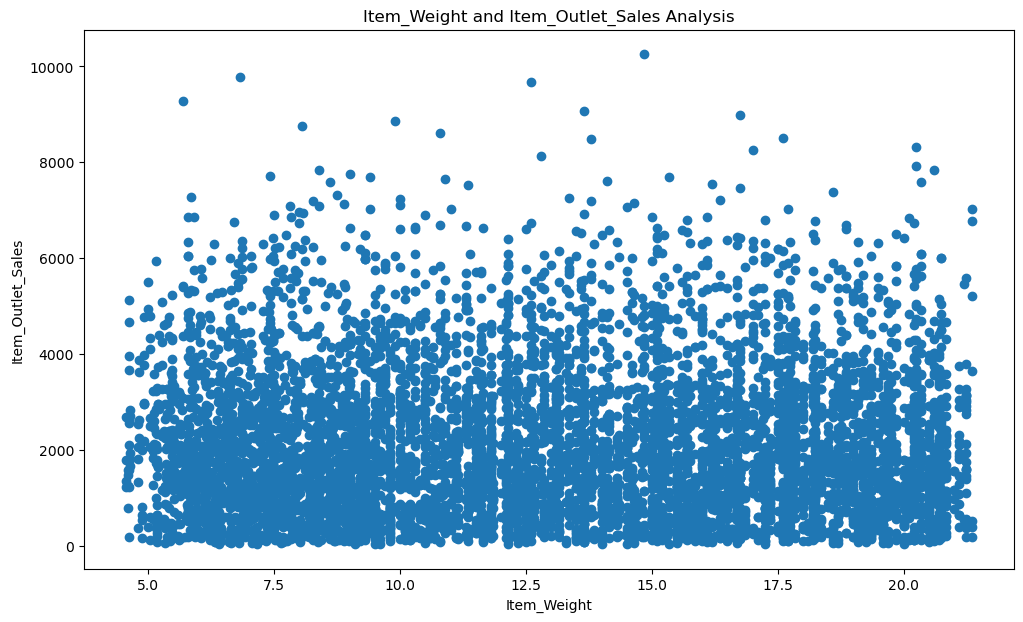

In [38]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.scatter(bigm_train.Item_Weight, bigm_train.Item_Outlet_Sales)

There seems to be no correlation between the item weight and the sales. An expected result since it shows the same thing in the correlation table.

# **8)Missing Value Treatment**

In [39]:
bigm_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
bigm_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There seems to be only the same two columns in both training and test sets to have missing values. Let's proceed to clean our datasets and handle those missing values.

In [41]:
#Let's try dropping rows with missing values
train=bigm_train.dropna()
train.shape

(4650, 12)

Just by testing the method on our training dataset, it seems like almost half of the information is lost. We'll look for another method.

The Item_Weight column is a numerical column while the Outlet_Size is a categorical one. That must gives us an idea as to how to handle the missing values.

In [42]:
print('Training set')
print(bigm_train.Item_Weight.describe())
print( '\n')
print('Test Set')
print(bigm_test.Item_Weight.describe())

Training set
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


Test Set
count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64


In [43]:
bigm_train['Item_Weight'].fillna(bigm_train['Item_Weight'].mean(),inplace=True)  #replacing null values with mean values
bigm_test['Item_Weight'].fillna(bigm_train['Item_Weight'].mean(),inplace=True)

In [44]:
print(bigm_train.Item_Weight.isnull().sum())
print(bigm_test.Item_Weight.isnull().sum())

0
0


We filled all the missing values with the mean value of the column. Let's check the description of the column after imputation and compare it to the old values.

In [45]:
print('Training set')
print(bigm_train.Item_Weight.describe())
print( '\n')
print('Test Set')
print(bigm_test.Item_Weight.describe())

Training set
count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


Test Set
count    5681.000000
mean       12.723467
std         4.245629
min         4.555000
25%         9.195000
50%        12.857645
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64


The mean is still the same in the training set and changed in an insignificant way in the test set. The other values also didn't change that much. The changes are slitely observed so the imputation was succesfull.

Now let's move to the Outlet_Size column. We'll proceed with a mode imputation since we're dealing with a categorical column.

In [46]:
print(bigm_train['Outlet_Size'].mode())
print(bigm_test['Outlet_Size'].mode())

0    Medium
Name: Outlet_Size, dtype: object
0    Medium
Name: Outlet_Size, dtype: object


The column is unimodal so that makes things easier.

In [47]:
bigm_train['Outlet_Size'].fillna(bigm_train['Outlet_Size'].mode()[0],inplace=True)
bigm_test['Outlet_Size'].fillna(bigm_test['Outlet_Size'].mode()[0],inplace=True)

In [48]:
print(bigm_test.Outlet_Size.isnull().sum())
print(bigm_train.Outlet_Size.isnull().sum())

0
0


No more missing values!!

# **9)Feature Engineering**

In [49]:
bigm_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [50]:
bigm_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

**Item_Fat_Content**

For this column, we only have two possibilities: Low Fat or Regular. However, if we look at the item types, there are types that aren't edible meaning they can't be classified as Low Fat or even Regular. And knowing that we don't have any missing values, we can conclude that some inedible items have been mistakenly categorized just like the item in the 5th row above, it is of type Household but is considered as Low Fat which doesn't make sense. 

We can also see that item identifiers start with either FD(Food),DR(Drinks) or NC(Non Consumable).
This said, we should create another category "Non-Consumable" for the Item_Fat_Content.

In [51]:
bigm_train.loc[bigm_train['Item_Identifier'].str.startswith('NC'), 'Item_Fat_Content'] = 'Non-Consumable'
bigm_test.loc[bigm_test['Item_Identifier'].str.startswith('NC'), 'Item_Fat_Content'] = 'Non-Consumable'

In [52]:

print('Training set')
print(bigm_train.Item_Fat_Content.value_counts())
print( '\n')
print('Test Set')
print(bigm_test.Item_Fat_Content.value_counts())

Training set
Low Fat           3918
Regular           3006
Non-Consumable    1599
Name: Item_Fat_Content, dtype: int64


Test Set
Low Fat           2581
Regular           2013
Non-Consumable    1087
Name: Item_Fat_Content, dtype: int64


Issue resolved!!

**Item_Visibility**

In [53]:
n_zeros_train=(((bigm_train.Item_Visibility==0).sum())/bigm_train.shape[0])*100
print("Zeros rate in the column for training set:",n_zeros_train,'%')
n_zeros_test=(((bigm_test.Item_Visibility==0).sum())/bigm_test.shape[0])*100
print("Zeros rate in the column for test set:",n_zeros_test,'%')

Zeros rate in the column for training set: 6.1715358441863195 %
Zeros rate in the column for test set: 6.213694772047175 %


Over 6% of the variables in the Item_Visibility are zeros which doesn't make sense. A product can't have a null visibility.

In [54]:
bigm_train['Item_Visibility'].replace(0,bigm_train['Item_Visibility'].mean(),inplace=True)
bigm_test['Item_Visibility'].replace(0,bigm_test['Item_Visibility'].mean(),inplace=True)

In [55]:
n_zeros_train=(((bigm_train.Item_Visibility==0).sum())/bigm_train.shape[0])*100
print("Zeros rate in the column for training set:",n_zeros_train,'%')
n_zeros_test=(((bigm_test.Item_Visibility==0).sum())/bigm_test.shape[0])*100
print("Zeros rate in the column for test set:",n_zeros_test,'%')

Zeros rate in the column for training set: 0.0 %
Zeros rate in the column for test set: 0.0 %


Text(0, 0.5, 'Item_Outlet_Sales')

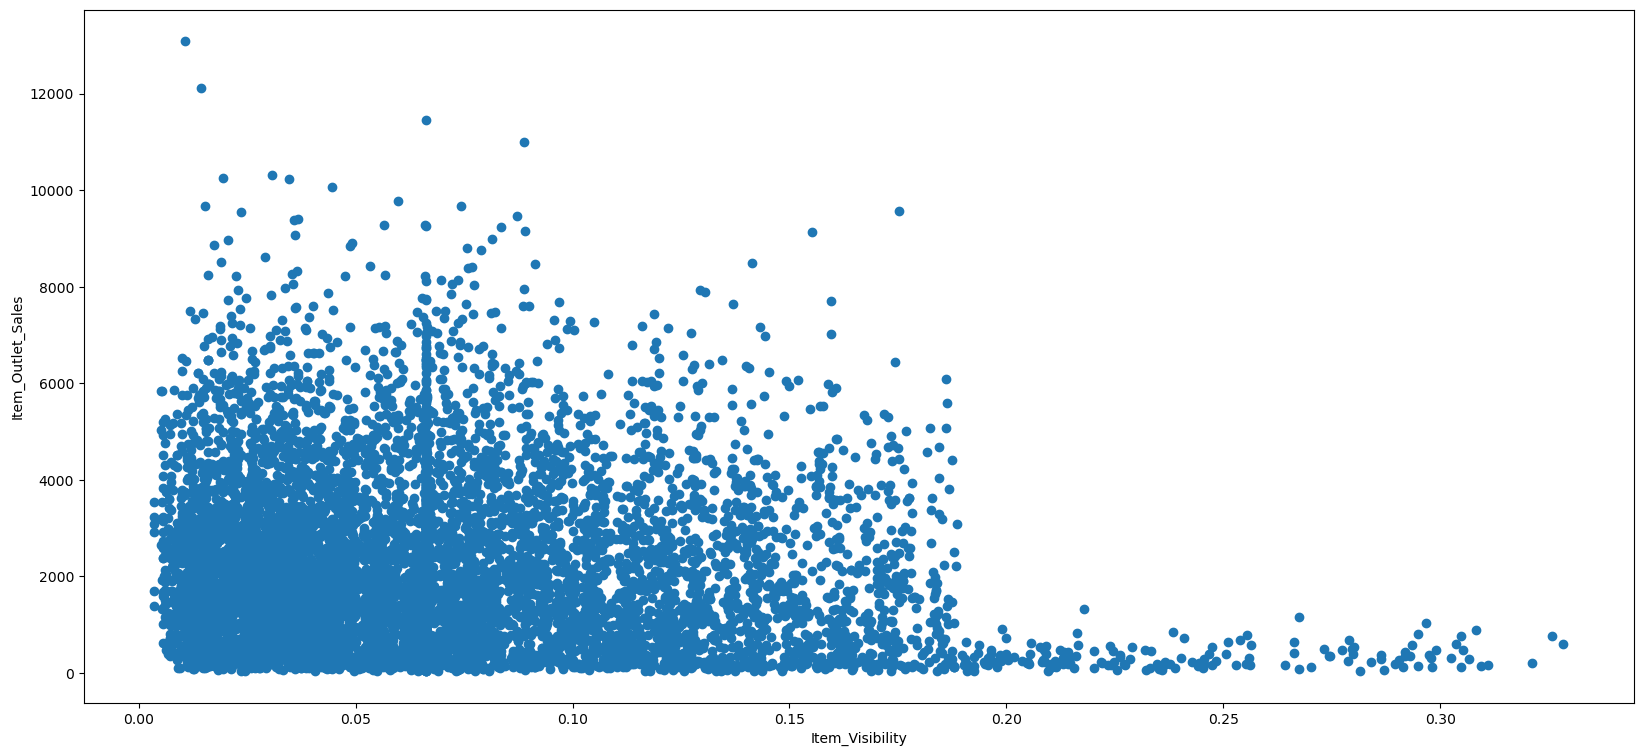

In [56]:
plt.figure(figsize=[20,9])
plt.scatter(bigm_train.Item_Visibility,bigm_train.Item_Outlet_Sales)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')

The negative correlation is more enhanced

**Outlet_Establishmen_Year**

Since we know that the data is from 2013, we can create a new feature **Outlet_Operation_Years** that gives us for how many years the outlets are operating.

In [57]:
bigm_train['Outlet_Operation_Years'] = 2013 - bigm_train['Outlet_Establishment_Year']
bigm_test['Outlet_Operation_Years'] = 2013 - bigm_test['Outlet_Establishment_Year']

In [58]:
bigm_train['Outlet_Operation_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Operation_Years, dtype: float64

In [59]:
bigm_test['Outlet_Operation_Years'].describe()

count    5681.000000
mean       15.171097
std         8.372256
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Operation_Years, dtype: float64

**Item_Type**

As we can see, the Item_Type fature has a high cardinality so using one hot encoding later on it would not be a good idea. This said, we suggest adding a new feature that splits the items into 3 categories: 'Food', 'Drinks' and 'Non-Consumable'.

In [60]:
bigm_train['New_Item_Type'] = bigm_train['Item_Identifier'].apply(lambda x: x[:2])
bigm_train['New_Item_Type'] = bigm_train['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

In [61]:
bigm_test['New_Item_Type'] = bigm_test['Item_Identifier'].apply(lambda x: x[:2])
bigm_test['New_Item_Type'] = bigm_test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

In [62]:
bigm_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066132   
4           NCD19         8.93   Non-Consumable         0.066132   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Operation_Years  \
0  Supermarket Type1          3735.1380                      14   
1  Supermarket Type2           443.4228                       4   
2  Supermarket Type1          2097.2700                      14   
3      Grocery Store           732.3800                      15   
4  Supermarket Type1           994.7052                      26   

    New_Item_Type  
0            Food  
1          Drinks  
2            Food  
3            Food  
4  Non-Consumable

In [63]:
bigm_test.shape

(5681, 13)

In [64]:
bigm_train.shape

(8523, 14)

# **10-11)Encoding Categorical Variables (Label Encoding)**

In [65]:
bigm_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.066132   
4           NCD19         8.93   Non-Consumable         0.066132   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Operation_Years  \
0  Supermarket Type1          3735.1380                      14   
1  Supermarket Type2           443.4228                       4   
2  Supermarket Type1          2097.2700                      14   
3      Grocery Store           732.3800                      15   
4  Supermarket Type1           994.7052                      26   

    New_Item_Type  
0            Food  
1          Drinks  
2            Food  
3            Food  
4  Non-Consumable

In [66]:
lencoder = LabelEncoder()
# Training Set
for i in (2,4,8,9,10,13):
    bigm_train.iloc[:,i] = lencoder.fit_transform(bigm_train.iloc[:,i])
# Test set
for i in (2,4,8,9,10,12):
    bigm_test.iloc[:,i] = lencoder.fit_transform(bigm_test.iloc[:,i])

/tmp/ipykernel_32/3159549428.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bigm_train.iloc[:,i] = lencoder.fit_transform(bigm_train.iloc[:,i])
/tmp/ipykernel_32/3159549428.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bigm_train.iloc[:,i] = lencoder.fit_transform(bigm_train.iloc[:,i])
/tmp/ipykernel_32/3159549428.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals`

In [67]:
# Checking the Unique values for categorical data after label encoding
print("Item_Fat_Content\n ",bigm_train.Item_Fat_Content.unique())
print("Outlet_Size\n ",bigm_train.Outlet_Size.unique())
print("Outlet_Location_Type\n ",bigm_train.Outlet_Location_Type.unique())
print("Item_Type\n ",bigm_train.Item_Type.unique())
print("New_Item_Type\n ",bigm_train.New_Item_Type.unique())
print("Outlet_Type\n ",bigm_train.Outlet_Type.unique())

Item_Fat_Content
  [0 2 1]
Outlet_Size
  [1 0 2]
Outlet_Location_Type
  [0 2 1]
Item_Type
  [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
New_Item_Type
  [1 0 2]
Outlet_Type
  [1 2 0 3]


# **12)One Hot Encoding**

In [68]:
bigm_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Outlet_Operation_Years         int64
New_Item_Type                  int64
dtype: object

In [69]:
bigm_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Operation_Years', 'New_Item_Type'],
      dtype='object')

In [70]:
bigm_train = pd.get_dummies(bigm_train, columns=['Item_Fat_Content','Outlet_Type','New_Item_Type'])
bigm_test = pd.get_dummies(bigm_test, columns=['Item_Fat_Content','Outlet_Type','New_Item_Type'])

In [71]:
bigm_test.shape

(5681, 20)

In [72]:
bigm_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Operation_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'New_Item_Type_0', 'New_Item_Type_1', 'New_Item_Type_2'],
      dtype='object')

# **13)PreProcessing Data**

We start first by removing outliers from the Item_Visibility and Item_Outlet_Sales columns.

In [73]:
scaler = StandardScaler()

columns = scaler.fit_transform(bigm_train[['Item_Outlet_Sales', 'Item_Visibility']])

z_scores = np.abs(columns)

z_score_threshold = 2.5

outliers = np.where(z_scores > z_score_threshold)

samples_with_outliers = set(outliers[0])
print("Original data shape:", bigm_train.shape)
bigm_train = bigm_train.drop(samples_with_outliers)
print("Data shape after removing outliers:", bigm_train.shape)

Original data shape: (8523, 21)
Data shape after removing outliers: (8173, 21)


We can drop some columns as they contribute nothing to the sales like the 'Item_Identifier'and 'Outlet_Identifier'. The 'Outlet_Establishment_Year' can be dropped too as we created another feature 'Outlet_Operation_Years' that serves the same purpose.

In [74]:
X = bigm_train.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = bigm_train['Item_Outlet_Sales']
X_test= bigm_test.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])

In [75]:
# Split the dataset into training and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=22)

# **14)Modeling**

 **A)Linear Regression**

In [76]:
lr= LinearRegression()
model_lr=lr.fit(X_train,y_train)

In [77]:
y_pred_lr=lr.predict(X_valid)

In [78]:
cv_score_lr = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score_lr = np.abs(np.mean(cv_score_lr))
    
print("Model Report")
print("MSE:",mean_squared_error(y_valid,y_pred_lr))
print("MAE:",mean_absolute_error(y_valid,y_pred_lr))
print("CV Score:", cv_score_lr)

Model Report
MSE: 1042700.6724060215
MAE: 777.6700709515155
CV Score: 1003842.6069021176


 **B)Regularized Linear Regression**

In [79]:
# Initialize the Ridge regression model
ridge = Ridge(alpha=0.7)  # Adjust the alpha value as needed

# Fit the model on the training data
model_ridge=ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge.predict(X_valid)

cv_score_ridge = cross_val_score(model_ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score_ridge= np.abs(np.mean(cv_score_ridge))
    
print("Model Report")
print("MSE:",mean_squared_error(y_valid,y_pred_ridge))
print("MAE:",mean_absolute_error(y_valid,y_pred_ridge))
print("CV Score:", cv_score_ridge)

Model Report
MSE: 1042661.2288891979
MAE: 777.6339404043858
CV Score: 1003837.8715363627


 **C)RandomForest**

In [80]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Adjust the number of estimators as needed
    'max_depth': [None, 5, 10],  # Adjust the maximum depth as needed
    'min_samples_split': [2, 5, 10]  # Adjust the minimum samples split as needed
}
# Initialize the Random Forest regression model
rf = RandomForestRegressor(random_state=42)  # Adjust the number of estimators as needed

# Perform grid search to find the best parameters
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Get the best model and its parameters
best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_


# Make predictions on the test data
y_pred_rf = best_model_rf.predict(X_valid)

cv_score_rf = cross_val_score(best_model_rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score_rf= np.abs(np.mean(cv_score_rf))
    
print("Model Report")
print("MSE:",mean_squared_error(y_valid,y_pred_rf))
print("MAE:",mean_absolute_error(y_valid,y_pred_rf))
print("CV Score:", cv_score_rf)

Model Report
MSE: 967837.5264641969
MAE: 716.845604499918
CV Score: 936748.1303916002


 **D)XGBoost**

In [81]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Adjust the number of estimators as needed
    'max_depth': [3, 5, 7],  # Adjust the maximum depth as needed
    'learning_rate': [0.1, 0.01, 0.001]  # Adjust the learning rate as needed
}

# Initialize the XGBoost regression model
xgb = XGBRegressor(random_state=42)

# Perform grid search to find the best parameters
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# Get the best model and its parameters
best_model_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_

# Make predictions on the test data using the best model
y_pred_xgb = best_model_xgb.predict(X_valid)

cv_score_xgb = cross_val_score(best_model_xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score_xgb= np.abs(np.mean(cv_score_xgb))
    
print("Model Report")
print("MSE:",mean_squared_error(y_valid,y_pred_xgb))
print("MAE:",mean_absolute_error(y_valid,y_pred_xgb))
print("CV Score:", cv_score_xgb)

Model Report
MSE: 966159.2290544584
MAE: 717.6915765819809
CV Score: 939323.0714913381


In [82]:
print("Linear regression               MAE:",mean_absolute_error(y_valid,y_pred_lr), "/    CV Score:",cv_score_lr,"/    MSE:",mean_squared_error(y_valid,y_pred_lr))
print("Regularised linear regression   MAE:",mean_absolute_error(y_valid,y_pred_ridge), "/    CV Score:",cv_score_ridge,"/    MSE:",mean_squared_error(y_valid,y_pred_ridge))
print("Random Forest                   MAE:",mean_absolute_error(y_valid,y_pred_rf), "/    CV Score:",cv_score_rf,"/    MSE:",mean_squared_error(y_valid,y_pred_rf))
print("XGBoost                         MAE:",mean_absolute_error(y_valid,y_pred_xgb), "/    CV Score:",cv_score_xgb,"/    MSE:",mean_squared_error(y_valid,y_pred_xgb))

Linear regression               MAE: 777.6700709515155 /    CV Score: 1003842.6069021176 /    MSE: 1042700.6724060215
Regularised linear regression   MAE: 777.6339404043858 /    CV Score: 1003837.8715363627 /    MSE: 1042661.2288891979
Random Forest                   MAE: 716.845604499918 /    CV Score: 936748.1303916002 /    MSE: 967837.5264641969
XGBoost                         MAE: 717.6915765819809 /    CV Score: 939323.0714913381 /    MSE: 966159.2290544584


# **15)Summary**

Judging from the results above, we can conclude that the best combination of MAE, MSEand CV score is that obtained by using the XGBoost model. So we'll be using it to predict the sales later.

# **Predictions on Test Set**

In [108]:

bigm_test_identifiers =pd.DataFrame(bigm_test[['Item_Identifier', 'Outlet_Identifier']],dtype=('S'))



bigm_test_predictions =pd.DataFrame(best_model_xgb.predict(X_test), columns=['Item_Outlet_Sales'],dtype=('S'))

final_result = pd.concat([bigm_test_identifiers,bigm_test_predictions], axis=1)
final_result=final_result.astype('S')
final_result.dtypes

Item_Identifier       |S6
Outlet_Identifier     |S6
Item_Outlet_Sales    |S32
dtype: object

# **Saving The Test Predictions**

In [92]:
final_result.to_csv('bigm_test_predictions.csv')

In [113]:


file_path = 'predictions.pkl'
final_result.to_pickle(file_path)